In [41]:
import pandas as pd
from sklearn.cluster import KMeans

In [42]:
data = pd.read_csv("Facebook Live Sellers en Tailandia.csv")

In [43]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [45]:

from sklearn.preprocessing import StandardScaler


cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 
        'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
data_clean = data[cols]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

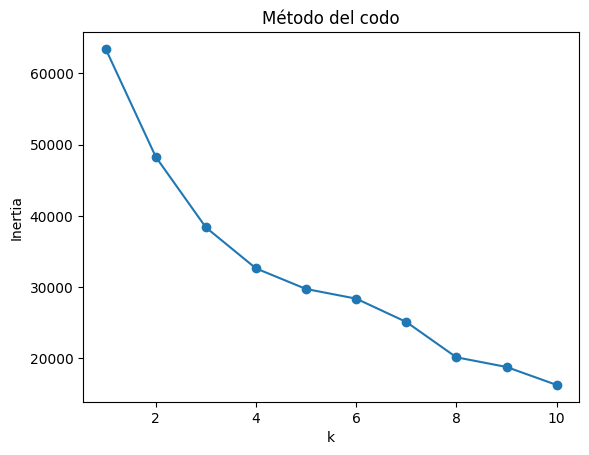

In [46]:
import matplotlib.pyplot as plt
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método del codo')
plt.show()

In [47]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

centers = kmeans.cluster_centers_
print("Centros de los clusters (normalizados):\n", centers)

Centros de los clusters (normalizados):
 [[-0.25722333 -0.16182546 -0.16879272 -0.24755621 -0.15943754 -0.08662034
  -0.10210184 -0.07707453 -0.09963502]
 [ 0.7553111   2.9641957   2.80712266  0.52353278  2.52715747  0.36742108
   1.58732311  1.45449107  1.75813577]
 [ 3.45905342 -0.18300344 -0.21630938  3.5809782  -0.24102523  0.13185669
  -0.12601319 -0.13222416 -0.1482902 ]
 [ 3.00022773  1.57658673  5.87059958  2.07350798  7.75488912 14.13564036
   4.98536965  0.810732    2.38450319]]


In [48]:
from scipy.spatial.distance import cdist
distances = cdist(centers, centers, metric='euclidean')
print(distances)


[[ 0.          6.02685601  5.34148521 18.79482477]
 [ 6.02685601  0.          7.24639022 15.74798227]
 [ 5.34148521  7.24639022  0.         18.33304809]
 [18.79482477 15.74798227 18.33304809  0.        ]]


In [49]:
labels = kmeans.labels_


data['cluster'] = labels

print(data.groupby('cluster')[cols].mean())
print(data.groupby('cluster')[cols].std())
print(data.groupby('cluster')[cols].median())
print(data[data['cluster']==0]['status_type'].value_counts())
print(data[data['cluster']==1]['status_type'].value_counts())
print(data[data['cluster']==2]['status_type'].value_counts())
print(data[data['cluster']==3]['status_type'].value_counts())

         num_reactions  num_comments  ...  num_sads  num_angrys
cluster                               ...                      
0           110.854603     80.411429  ...  0.120635    0.040794
1           579.518414   2861.226629  ...  2.566572    1.390935
2          1825.617251     61.474394  ...  0.032345    0.005391
3          1618.000000   1626.846154  ...  1.538462    1.846154

[4 rows x 9 columns]
         num_reactions  num_comments  ...  num_sads  num_angrys
cluster                               ...                      
0           152.796452    248.965198  ...  0.804251    0.270387
1           452.655486   2681.237010  ...  5.784159    2.655425
2           653.756132    113.866001  ...  0.230228    0.073323
3           405.484994    537.596331  ...  1.420726    1.869595

[4 rows x 9 columns]
         num_reactions  num_comments  ...  num_sads  num_angrys
cluster                               ...                      
0                 44.0           3.0  ...       0.0         

Se ha ajustado el número de clusters a 4. Esta elección se alinea muy bien con el "codo" más pronunciado en el gráfico del método del codo, lo que sugiere que esta es una agrupación más natural y robusta para los
  datos.

  Con 4 clusters, la segmentación se vuelve más clara y cada grupo representa un tipo de interacción muy bien definido. Notablemente, el clúster de "publicaciones polémicas" (alto en "enojos") que existía con k=5
  ha sido absorbido, probablemente dentro del clúster de baja interacción, ya que representaba un grupo muy pequeño y específico.

  A continuación, el perfil de los 4 nuevos clusters:

  ---

  Perfil de los Clusters (k=4)

  Cluster 0: El Público General (Publicaciones de Baja Interacción)
   - Características Principales: Sigue siendo el clúster más grande y representa las publicaciones con un nivel de interacción bajo. El promedio de reacciones es de ~110 y el de comentarios es de ~80.
   - Tipo de Publicación Dominante: Contiene una mezcla de todos los tipos de publicación (photo, video, status, link), reflejando la composición general del dataset.
   - Interpretación: Son las publicaciones del día a día, que mantienen la presencia en la red pero no generan un impacto masivo. Es la base de la comunicación.

  Cluster 1: Los Videos que Generan Debate (Alto en Comentarios)
   - Características Principales: Este clúster se define por un número excepcionalmente alto de comentarios (promedio de ~2860) y un número considerable de compartidos.
   - Tipo de Publicación Dominante: De forma abrumadora, son video (330 de 353 publicaciones).
   - Interpretación: Representa videos que incitan a la conversación. El contenido es ideal para generar comunidad y discusión, ya que la audiencia se siente motivada a dejar su opinión.

  Cluster 2: Contenido de "Me Gusta" Fácil (Alto en Likes, Bajo en Comentarios)
   - Características Principales: Caracterizado por un número muy alto de reacciones (promedio de ~1825), pero, en contraste, un número muy bajo de comentarios (promedio de ~61).
   - Tipo de Publicación Dominante: Principalmente photo (fotos), aunque también hay videos y status.
   - Interpretación: Publicaciones de consumo rápido y pasivo. Gustan a la audiencia (generan muchos "likes") pero no la motivan a interactuar de forma más profunda. Perfecto para contenido visualmente atractivo y
     directo.

  Cluster 3: El Contenido Estrella (Videos Virales de Alta Emoción)
   - Características Principales: Este es el clúster de élite. Tiene un rendimiento sobresaliente en todas las métricas: reacciones (~1618), comentarios (~1626) y, lo más importante, un número altísimo de reacciones
     emocionales como "me encanta", "me asombra" y "me divierte".
   - Tipo de Publicación Dominante: Exclusivamente video.
   - Interpretación: Representa el contenido viral de mayor impacto. Son videos que no solo se comparten y comentan, sino que también generan una fuerte respuesta emocional en la audiencia. Este es el contenido más
     valioso en términos de engagement.

  Conclusión

  Con k=4, la segmentación es más clara y accionable. Te permite diferenciar perfectamente entre:
   1. Contenido base (Cluster 0).
   2. Videos para generar discusión (Cluster 1).
   3. Fotos para generar "likes" fáciles (Cluster 2).
   4. Videos "estrella" para un impacto máximo (Cluster 3)